In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [7]:
df_train.Sex = df_train.Sex.astype('category').cat.codes
df_test.Sex = df_test.Sex.astype('category').cat.codes
df_train.Embarked = df_train.Embarked.astype('category').cat.codes
df_test.Embarked = df_test.Embarked.astype('category').cat.codes

In [8]:
df_train.Age.fillna(int(df_train.Age.mean()), inplace=True)
df_test.Age.fillna(int(df_test.Age.mean()), inplace=True)
df_train.Embarked.fillna(int(df_train.Embarked.mean()), inplace=True)
df_test.Fare.fillna(int(df_test.Fare.mean()), inplace=True)

In [9]:
import matplotlib as mlp
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from matplotlib import rcParams
rcParams['figure.figsize'] = 10, 5

<AxesSubplot:xlabel='Age', ylabel='Count'>

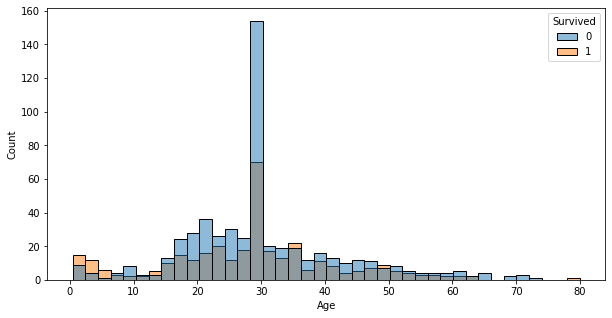

In [10]:
sns.histplot(x='Age', hue='Survived', bins=40, data=df_train)

<AxesSubplot:xlabel='Fare', ylabel='Count'>

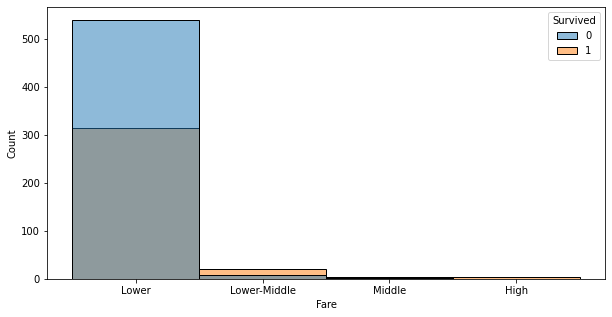

In [11]:
lst = ['Lower', 'Lower-Middle', 'Middle', 'High']
sns.histplot(x=pd.cut(df_train.Fare, 4, labels=lst), hue='Survived', data=df_train)

<AxesSubplot:xlabel='Pclass', ylabel='count'>

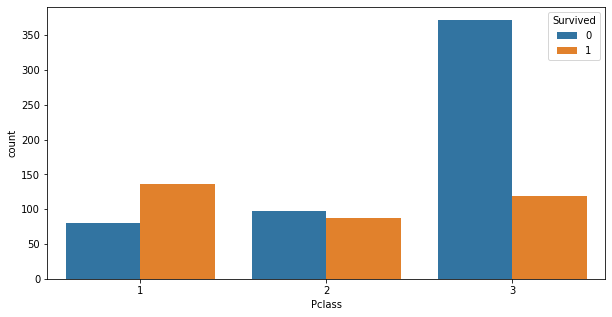

In [12]:
sns.countplot(x='Pclass', hue='Survived', data=df_train)

<AxesSubplot:xlabel='Sex', ylabel='count'>

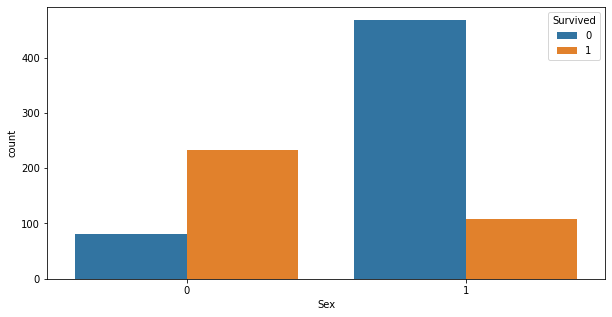

In [13]:
sns.countplot(x='Sex', hue='Survived', data=df_train)

<AxesSubplot:xlabel='SibSp', ylabel='count'>

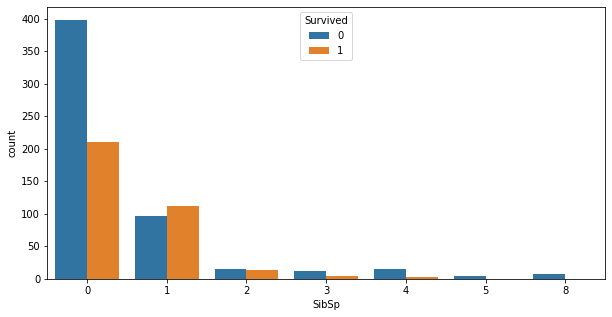

In [14]:
sns.countplot(x='SibSp', hue='Survived', data=df_train)

<AxesSubplot:xlabel='Parch', ylabel='Count'>

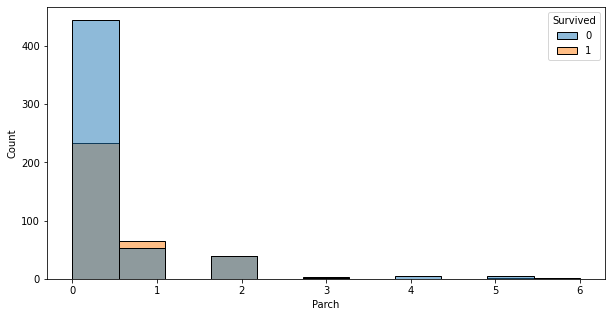

In [15]:
sns.histplot(x='Parch', hue='Survived', data=df_train)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

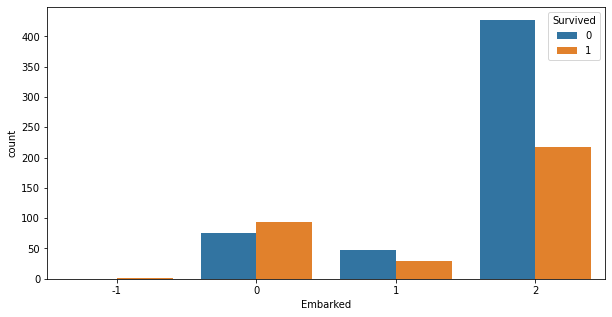

In [16]:
sns.countplot(x='Embarked', hue='Survived', data=df_train)

In [17]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
df_train = df_train.drop(['Name','Ticket','Cabin'], axis=1)
df_test = df_test.drop(['Name','Ticket','Cabin'], axis=1)

In [19]:
df_train.Age = MinMaxScaler().fit_transform(np.array(df_train.Age).reshape(-1,1))
df_train.Fare = MinMaxScaler().fit_transform(np.array(df_train.Fare).reshape(-1,1))
df_test.Age = MinMaxScaler().fit_transform(np.array(df_test.Age).reshape(-1,1))
df_test.Fare = MinMaxScaler().fit_transform(np.array(df_test.Fare).reshape(-1,1))

In [20]:
x = df_train.drop('Survived', axis=1)

In [21]:
y = df_train.Survived

In [22]:
print('x size:', x.shape)
print('y size:', y.shape)

x size: (891, 8)
y size: (891,)


# Logistic Regression

In [23]:
lr = LogisticRegression(C=0.01, solver='lbfgs')

In [24]:
lr.fit(x, y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression(C=0.01)

In [25]:
lr.score(x, y)

0.7620650953984287

In [26]:
yhat = lr.predict(x)

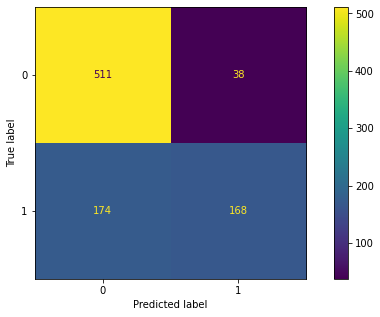

In [27]:
cm = confusion_matrix(y, yhat, labels=lr.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=lr.classes_)

disp.plot()
plt.show()

In [28]:
col1 = df_test.PassengerId

In [29]:
col2 = lr.predict(df_test)

In [30]:
df1 = pd.DataFrame(col1, columns=['PassengerId'])
df2 = pd.DataFrame(col2, columns=['Survived'])

In [31]:
result = pd.concat([df1, df2], axis=1, join='inner')

In [32]:
result.to_csv('submission.csv',index = False)

In [33]:
result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB
